# **Setting**

In [ ]:
! pip install koreanize-matplotlib

In [3]:
# system
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/메타버스 아카데미/Data')
import warnings
warnings.filterwarnings('ignore')                       # warning 출력 false

# dataframe
import pickle
import numpy as np
import pandas as pd

# plot
import matplotlib as mpl
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from PIL import Image

# sklearn
from sklearn.model_selection import train_test_split

# tensorflow
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# **1. 데이터 불러오기**

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

print(f'X_train={X_train.shape}, y_train={y_train.shape}, X_test={X_test.shape}, X_train={y_test.shape}')

170498071/170498071 [==============================] - 2s 0us/step
X_train=(50000, 32, 32, 3), y_train=(50000,), X_test=(10000, 32, 32, 3), X_train=(10000,)


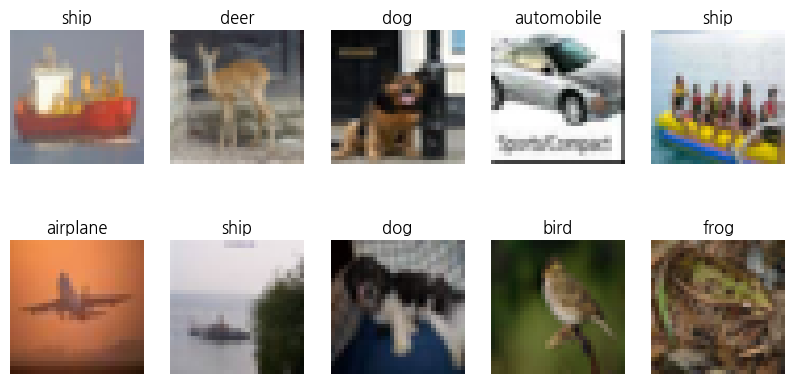

In [5]:
# 데이터 그리기
np.random.seed(100)
random_idx = np.random.randint(50000, size=10)

class_names = ['airplane','automobile', 'bird',' cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(figsize=(10, 5))

for i, idx in enumerate(random_idx):
    ax = plt.subplot(2, 5, i+1)

    ax.imshow(X_train[idx])
    ax.set(title=class_names[y_train[idx]])
    ax.axis('off')

## ***! Caution 분류가 힘든 이유?***
* 색깔이 같다고 같은 분류가 아니다! ⟶ 정규화 필요(R 평균, G 평균, B 평균)

# **2. 데이터 전처리**

## **1) Scaling**

In [6]:
# Scaling 평균, 표준편차 계산
x_mean = np.mean(X_train, axis=(0,1,2))         # 각 채널의 평균 계산
x_std = np.std(X_train, axis=(0,1,2))
print(x_mean)
print(x_std)

[125.30691805 122.95039414 113.86538318]
[62.99321928 62.08870764 66.70489964]


In [7]:
# 표준화(Standardization)
X_train = (X_train-x_mean) / x_std
X_test = (X_test-x_mean) / x_std

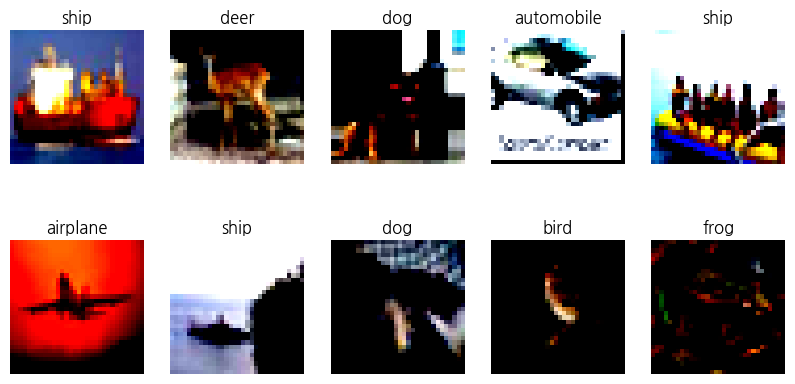

In [8]:
# 데이터 그리기
np.random.seed(100)
random_idx = np.random.randint(50000, size=10)

class_names = ['airplane','automobile', 'bird',' cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(figsize=(10, 5))

for i, idx in enumerate(random_idx):
    ax = plt.subplot(2, 5, i+1)

    ax.imshow(X_train[idx])
    ax.set(title=class_names[y_train[idx]])
    ax.axis('off')

## **2) 데이터 분할**

## ***! Note Validation data의 필요성***
* 과적합 여부를 확인하기 위함

In [9]:
# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=100)

print(f'X_train={X_train.shape}, X_val={X_val.shape}, X_test={X_test.shape}, y_train={y_train.shape}, y_val={y_val.shape}, y_test={y_test.shape}')

X_train=(35000, 32, 32, 3), X_val=(15000, 32, 32, 3), X_test=(10000, 32, 32, 3), y_train=(35000,), y_val=(15000,), y_test=(10000,)


# **3. 모델 설정**

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D

## **Model 1. 기본 모델**

In [80]:
model = Sequential()

model.add( Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(32,32,3)) )
model.add( Conv2D(filters=32,kernel_size=3,padding='same',activation='relu') )
model.add( MaxPool2D(pool_size=(2,2),strides=2,padding='same') )
model.add( Conv2D(filters=64,kernel_size=3,padding='same',activation='relu') )
model.add( Conv2D(filters=64,kernel_size=3,padding='same',activation='relu') )
model.add( MaxPool2D(pool_size=(2,2),strides=2,padding='same') )
model.add( Conv2D(filters=128,kernel_size=3,padding='same',activation='relu') )
model.add( Conv2D(filters=128,kernel_size=3,padding='same',activation='relu') )
model.add( MaxPool2D(pool_size=(2,2),strides=2,padding='same') )
model.add( Flatten() )
model.add( Dense(64, activation='relu') )
model.add( Dense(32, activation='relu') )
model.add( Dense(10, activation='softmax') )

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_73 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_74 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_75 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                

## **1) learning_rate=0.0001**

In [87]:
# 모델 환경 설정하기(loss, optimizer, metrics 설정)
from tensorflow.keras.optimizers import Adam  ## 가장 많이 쓰이는 learning_rate = 0.0001, 0.0003, ....

model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=1e-4),metrics=['accuracy'])

## **2) learning_rate=0.001**

In [69]:
# 모델 환경 설정하기(loss, optimizer, metrics 설정)
from tensorflow.keras.optimizers import Adam  ## 가장 많이 쓰이는 learning_rate = 0.0001, 0.0003, ....

model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=1e-3),metrics=['accuracy'])

## **3) learning_rate=0.00001**

In [81]:
# 모델 환경 설정하기(loss, optimizer, metrics 설정)
from tensorflow.keras.optimizers import Adam  ## 가장 많이 쓰이는 learning_rate = 0.0001, 0.0003, ....

model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=1e-5),metrics=['accuracy'])

## **Model 2. Dropout 추가(실험 1 적용)**

In [88]:
model_d = Sequential()

model_d.add( Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(32,32,3)) )
model_d.add( Conv2D(filters=32,kernel_size=3,padding='same',activation='relu') )
model_d.add( MaxPool2D(pool_size=(2,2),strides=2,padding='same') )
model_d.add( Dropout(0.2) )
model_d.add( Conv2D(filters=64,kernel_size=3,padding='same',activation='relu') )
model_d.add( Conv2D(filters=64,kernel_size=3,padding='same',activation='relu') )
model_d.add( MaxPool2D(pool_size=(2,2),strides=2,padding='same') )
model_d.add( Dropout(0.2) )
model_d.add( Conv2D(filters=128,kernel_size=3,padding='same',activation='relu') )
model_d.add( Conv2D(filters=128,kernel_size=3,padding='same',activation='relu') )
model_d.add( MaxPool2D(pool_size=(2,2),strides=2,padding='same') )
model_d.add( Dropout(0.2) )
model_d.add( Flatten() )
model_d.add( Dense(64, activation='relu') )
model_d.add( Dense(32, activation='relu') )
model_d.add( Dense(10, activation='softmax') )

model_d.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_85 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_86 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_87 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

In [89]:
# 모델 환경 설정하기(loss, optimizer, metrics 설정)
from tensorflow.keras.optimizers import Adam  ## 가장 많이 쓰이는 learning_rate = 0.0001, 0.0003, ....

model_d.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=1e-4),metrics=['accuracy'])

## **Model 3. Dropout(0.5), layer 추가**

In [14]:
model3 = Sequential()

model3.add( Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(32,32,3)) )
model3.add( Conv2D(filters=32,kernel_size=3,padding='same',activation='relu') )
model3.add( MaxPool2D(pool_size=(2,2),strides=2,padding='same') )
model3.add( Dropout(0.5) )
model3.add( Conv2D(filters=64,kernel_size=3,padding='same',activation='relu') )
model3.add( Conv2D(filters=64,kernel_size=3,padding='same',activation='relu') )
model3.add( MaxPool2D(pool_size=(2,2),strides=2,padding='same') )
model3.add( Dropout(0.5) )
model3.add( Conv2D(filters=128,kernel_size=3,padding='same',activation='relu') )
model3.add( Conv2D(filters=128,kernel_size=3,padding='same',activation='relu') )
model3.add( MaxPool2D(pool_size=(2,2),strides=2,padding='same') )
model3.add( Dropout(0.5) )
model3.add( Flatten() )
model3.add( Dense(128, activation='relu') )
model3.add( Dense(64, activation='relu') )
model3.add( Dense(32, activation='relu') )
model3.add( Dense(10, activation='softmax') )

model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [15]:
# 모델 환경 설정하기(loss, optimizer, metrics 설정)
from tensorflow.keras.optimizers import Adam  ## 가장 많이 쓰이는 learning_rate = 0.0001, 0.0003, ....

model3.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=3e-4),metrics=['accuracy'])

# **4. 모델 학습 및 성능 평가**

## **Model 1. 기본 모델**

## **1) learning_rate=0.0001**

In [50]:
# 모델 학습
model_fit = model.fit(X_train,y_train,validation_data=(X_val, y_val),epochs=30,batch_size=32)

Epoch 1/30
1094/1094 [==============================] - 15s 10ms/step - loss: 1.8051 - accuracy: 0.3451 - val_loss: 1.5409 - val_accuracy: 0.4482
Epoch 2/30
1094/1094 [==============================] - 9s 8ms/step - loss: 1.4215 - accuracy: 0.4879 - val_loss: 1.3292 - val_accuracy: 0.5230
Epoch 3/30
1094/1094 [==============================] - 10s 9ms/step - loss: 1.2642 - accuracy: 0.5498 - val_loss: 1.2659 - val_accuracy: 0.5508
Epoch 4/30
1094/1094 [==============================] - 10s 9ms/step - loss: 1.1426 - accuracy: 0.5955 - val_loss: 1.1266 - val_accuracy: 0.6033
Epoch 5/30
1094/1094 [==============================] - 9s 8ms/step - loss: 1.0392 - accuracy: 0.6384 - val_loss: 1.0786 - val_accuracy: 0.6214
Epoch 6/30
1094/1094 [==============================] - 10s 9ms/step - loss: 0.9537 - accuracy: 0.6698 - val_loss: 1.0465 - val_accuracy: 0.6323
Epoch 7/30
1094/1094 [==============================] - 10s 9ms/step - loss: 0.8794 - accuracy: 0.6918 - val_loss: 0.9833 - val_acc

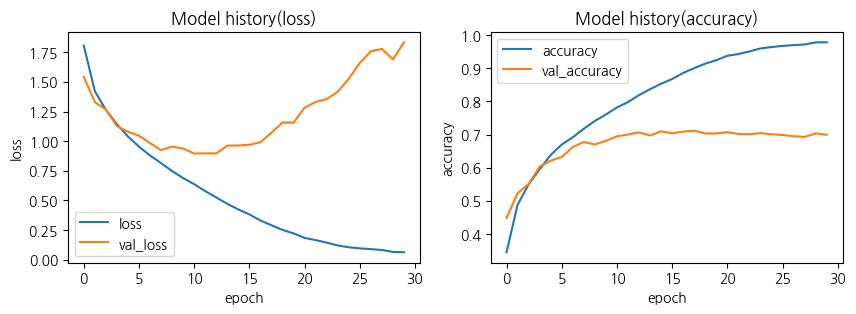

In [51]:
# 과적합 여부 판단
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

history = model_fit.history
names = ['loss', 'accuracy']

for i, name in enumerate(names):
    ax[i].plot(history[name], label=name)
    ax[i].plot(history['val_'+name], label='val_'+name)
    ax[i].set(xlabel='epoch', ylabel=name, title=f'Model history({name})')
    ax[i].legend()

In [61]:
# 성능 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.8921 - accuracy: 0.6969
Test accuracy: 0.6969000101089478


## **2) learning_rate=0.001**

In [70]:
# 모델 학습
model_fit = model.fit(X_train,y_train,validation_data=(X_val, y_val),epochs=30,batch_size=32)

Epoch 1/30
1094/1094 [==============================] - 13s 9ms/step - loss: 1.5569 - accuracy: 0.4265 - val_loss: 1.1649 - val_accuracy: 0.5783
Epoch 2/30
1094/1094 [==============================] - 9s 8ms/step - loss: 1.0209 - accuracy: 0.6373 - val_loss: 0.9687 - val_accuracy: 0.6608
Epoch 3/30
1094/1094 [==============================] - 9s 9ms/step - loss: 0.8032 - accuracy: 0.7190 - val_loss: 0.8243 - val_accuracy: 0.7119
Epoch 4/30
1094/1094 [==============================] - 10s 9ms/step - loss: 0.6680 - accuracy: 0.7661 - val_loss: 0.7445 - val_accuracy: 0.7391
Epoch 5/30
1094/1094 [==============================] - 10s 9ms/step - loss: 0.5588 - accuracy: 0.8056 - val_loss: 0.7385 - val_accuracy: 0.7444
Epoch 6/30
1094/1094 [==============================] - 9s 8ms/step - loss: 0.4622 - accuracy: 0.8392 - val_loss: 0.7597 - val_accuracy: 0.7513
Epoch 7/30
1094/1094 [==============================] - 9s 8ms/step - loss: 0.3819 - accuracy: 0.8653 - val_loss: 0.8016 - val_accura

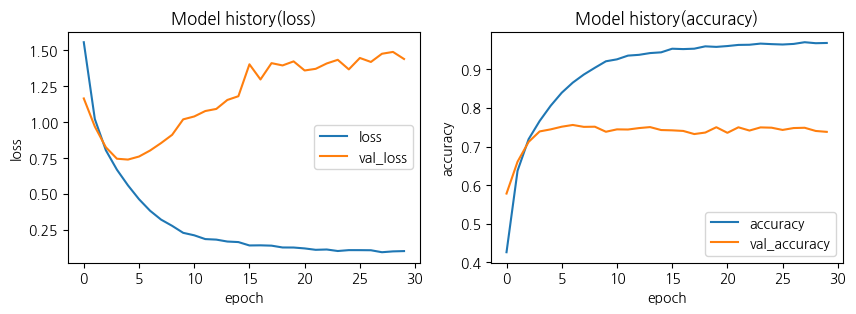

In [71]:
# 과적합 여부 판단
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

history = model_fit.history
names = ['loss', 'accuracy']

for i, name in enumerate(names):
    ax[i].plot(history[name], label=name)
    ax[i].plot(history['val_'+name], label='val_'+name)
    ax[i].set(xlabel='epoch', ylabel=name, title=f'Model history({name})')
    ax[i].legend()

In [72]:
# 성능 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.5108 - accuracy: 0.7359
Test accuracy: 0.7358999848365784


## **3) learning_rate=0.00001**

In [82]:
# 모델 학습
model_fit = model.fit(X_train,y_train,validation_data=(X_val, y_val),epochs=30,batch_size=32)

Epoch 1/30
1094/1094 [==============================] - 14s 9ms/step - loss: 2.1225 - accuracy: 0.2365 - val_loss: 1.8931 - val_accuracy: 0.3257
Epoch 2/30
1094/1094 [==============================] - 9s 8ms/step - loss: 1.7925 - accuracy: 0.3601 - val_loss: 1.7155 - val_accuracy: 0.3903
Epoch 3/30
1094/1094 [==============================] - 9s 8ms/step - loss: 1.6662 - accuracy: 0.4041 - val_loss: 1.6191 - val_accuracy: 0.4213
Epoch 4/30
1094/1094 [==============================] - 9s 8ms/step - loss: 1.5944 - accuracy: 0.4306 - val_loss: 1.5622 - val_accuracy: 0.4423
Epoch 5/30
1094/1094 [==============================] - 8s 7ms/step - loss: 1.5383 - accuracy: 0.4515 - val_loss: 1.5082 - val_accuracy: 0.4589
Epoch 6/30
1094/1094 [==============================] - 9s 8ms/step - loss: 1.4955 - accuracy: 0.4670 - val_loss: 1.4981 - val_accuracy: 0.4693
Epoch 7/30
1094/1094 [==============================] - 8s 8ms/step - loss: 1.4580 - accuracy: 0.4837 - val_loss: 1.4623 - val_accuracy

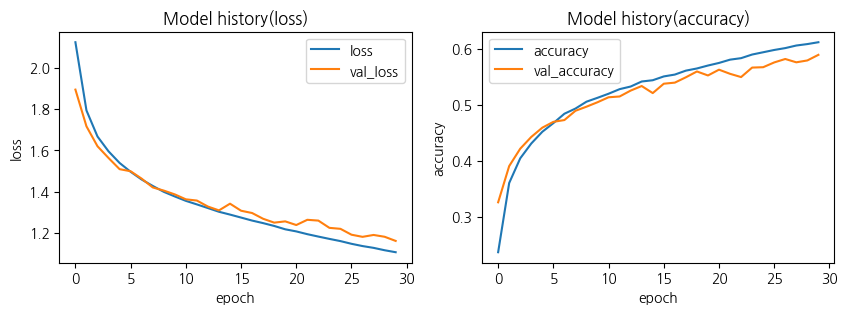

In [83]:
# 과적합 여부 판단
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

history = model_fit.history
names = ['loss', 'accuracy']

for i, name in enumerate(names):
    ax[i].plot(history[name], label=name)
    ax[i].plot(history['val_'+name], label='val_'+name)
    ax[i].set(xlabel='epoch', ylabel=name, title=f'Model history({name})')
    ax[i].legend()

In [84]:
# 성능 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.1675 - accuracy: 0.5868
Test accuracy: 0.5867999792098999


## ***! Note 과적합 발생했을때***
### **실험결과**
* learning_rate=1e-4 일 때 과적합 발생
* leraning_rate=1e-3 일 때 더 빨리 과적합 되는 것을 확인
* learning_rate=1e-5 일 때 과적합은 발생하지 않았으나 성능이 낮은 것을 확인

### **해결방법**
1. Dropout<br>
다음 모든 노드에 연결되지 않고, 일부분(랜덤, default=0.5)만 연결된다.

2. Batch_Normalization(Dropout이 더 효과적)
3. 학습 데이터 추가 또는 학습 데이터 전처리 다시

## **Model 2. Dropout 추가(실험 1 적용)**

In [90]:
# 모델 학습
model_d_fit = model_d.fit(X_train,y_train,validation_data=(X_val, y_val),epochs=30,batch_size=32)

Epoch 1/30
1094/1094 [==============================] - 15s 10ms/step - loss: 1.8788 - accuracy: 0.3163 - val_loss: 1.5810 - val_accuracy: 0.4269
Epoch 2/30
1094/1094 [==============================] - 10s 9ms/step - loss: 1.5041 - accuracy: 0.4535 - val_loss: 1.3513 - val_accuracy: 0.5154
Epoch 3/30
1094/1094 [==============================] - 12s 11ms/step - loss: 1.3343 - accuracy: 0.5205 - val_loss: 1.2308 - val_accuracy: 0.5622
Epoch 4/30
1094/1094 [==============================] - 10s 10ms/step - loss: 1.2151 - accuracy: 0.5685 - val_loss: 1.1448 - val_accuracy: 0.5899
Epoch 5/30
1094/1094 [==============================] - 11s 10ms/step - loss: 1.1253 - accuracy: 0.6009 - val_loss: 1.0364 - val_accuracy: 0.6356
Epoch 6/30
1094/1094 [==============================] - 10s 10ms/step - loss: 1.0404 - accuracy: 0.6322 - val_loss: 0.9747 - val_accuracy: 0.6553
Epoch 7/30
1094/1094 [==============================] - 9s 8ms/step - loss: 0.9732 - accuracy: 0.6592 - val_loss: 0.9599 - va

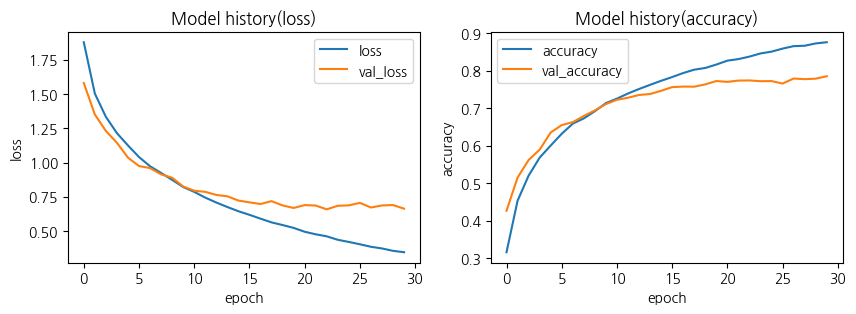

In [91]:
# 과적합 여부 판단
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

history = model_d_fit.history
names = ['loss', 'accuracy']

for i, name in enumerate(names):
    ax[i].plot(history[name], label=name)
    ax[i].plot(history['val_'+name], label='val_'+name)
    ax[i].set(xlabel='epoch', ylabel=name, title=f'Model history({name})')
    ax[i].legend()

In [92]:
# 성능 평가
test_loss, test_acc = model_d.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.7094 - accuracy: 0.7755
Test accuracy: 0.7754999995231628


## **Model 3. Dropout(0.5), layer 추가**

In [ ]:
from keras.callbacks import EarlyStopping

# 학습 중단 설정
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=3)

# 모델 학습
model3_fit = model3.fit(X_train,y_train,validation_data=(X_val, y_val),epochs=200,batch_size=32)

Epoch 1/200
1094/1094 [==============================] - 335s 305ms/step - loss: 1.8646 - accuracy: 0.2988 - val_loss: 1.5564 - val_accuracy: 0.4256
Epoch 2/200
1094/1094 [==============================] - 324s 296ms/step - loss: 1.4372 - accuracy: 0.4677 - val_loss: 1.2577 - val_accuracy: 0.5534
Epoch 3/200
1094/1094 [==============================] - 312s 285ms/step - loss: 1.2471 - accuracy: 0.5456 - val_loss: 1.1117 - val_accuracy: 0.6014
Epoch 4/200
1094/1094 [==============================] - 329s 301ms/step - loss: 1.1252 - accuracy: 0.5973 - val_loss: 0.9819 - val_accuracy: 0.6504
Epoch 5/200
1094/1094 [==============================] - 324s 296ms/step - loss: 1.0429 - accuracy: 0.6278 - val_loss: 0.8914 - val_accuracy: 0.6801
Epoch 6/200
1094/1094 [==============================] - 324s 296ms/step - loss: 0.9731 - accuracy: 0.6510 - val_loss: 0.8927 - val_accuracy: 0.6801
Epoch 7/200
1094/1094 [==============================] - 323s 296ms/step - loss: 0.9174 - accuracy: 0.6744

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-13030ec056ab>", line 7, in <cell line: 7>
    model3_fit = model3.fit(X_train,y_train,validation_data=(X_val, y_val),epochs=200,batch_size=32)
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1685, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 894, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3

In [ ]:
# 과적합 여부 판단
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

history = model3_fit.history
names = ['loss', 'accuracy']

for i, name in enumerate(names):
    ax[i].plot(history[name], label=name)
    ax[i].plot(history['val_'+name], label='val_'+name)
    ax[i].set(xlabel='epoch', ylabel=name, title=f'Model history({name})')
    ax[i].legend()

In [ ]:
# 성능 평가
test_loss, test_acc = model3.evaluate(X_test, y_test)
print(test_loss, test_acc)
print('Test accuracy:', test_acc)

In [106]:
# 성능 평가(제출 코드, 중간에 중단함.)
test_loss, test_acc = model3.evaluate(X_test, y_test)
print(test_loss, test_acc)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.6310 - accuracy: 0.8057
0.6309625506401062 0.8057000041007996
Test accuracy: 0.8057000041007996


# **5. 모델 저장**

## **1) 모델을 저장(용량 큼)**

In [ ]:
# 모델 저장하기
save_path = './models/'
model.save(save_path + 'cifar10_model.h5')

In [ ]:
# 모델 불러오기
from tensorflow.keras.models import load_model

new_model = load_model(save_path + 'cifar10_model.h5')

## **2) 가중치만 저장**

In [ ]:
# 가중치 저장하기
model.save_weights(save_path + 'cifar10_model_w')

In [ ]:
# 새 모델에 가중치 업데이트 하기
# new_model = Sequential()...... # 똑같은 모델을 생성한 후 진행해야 한다.

new_model.load_weights(save_path + 'cifar10_model_w')

# **6. Feature map 추출하기**

In [ ]:
get_output = []
layer_names = []
for layer in model.layers:
    get_output.apepnd(layer.output)
    layer_names.append(layer.name)

print(get_output)
print(layer_names)

In [ ]:
from tensorflow.keras.models import Model

test_img = np.reshape(X_test[0], (-1,32,32,3))
visual_model = Model(inputs=model.input, outputs=get_output)
feature_maps = visual_model.predict(test_img)

In [ ]:
# layer 1. 32개의 feature maps
for layer_name, feature_map in zip(layer_names, feature_maps):
    if len(feature_maps) == 4:
        img_size = feature_map.shape[1]
        feature_size = feature_map.shape[-1]

        fig = plt.figure(figsize=(20,10))
        for i in range(feature_size):
            x = feature_map[0,:,:,i]
            ax = plt.subplot(4, 8, i+1)
            ax.imshow(x, cmap='viridis')
            ax.set_title(f'{i}th feature. {layer_name}')

# **7. 예측하기**

In [57]:
y_pred_p = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [63]:
print(y_test)

[3 8 8 ... 5 1 7]


In [58]:
y_pred = y_pred_p.argmax(axis=1)
print(y_pred)

[3 8 8 ... 2 1 7]


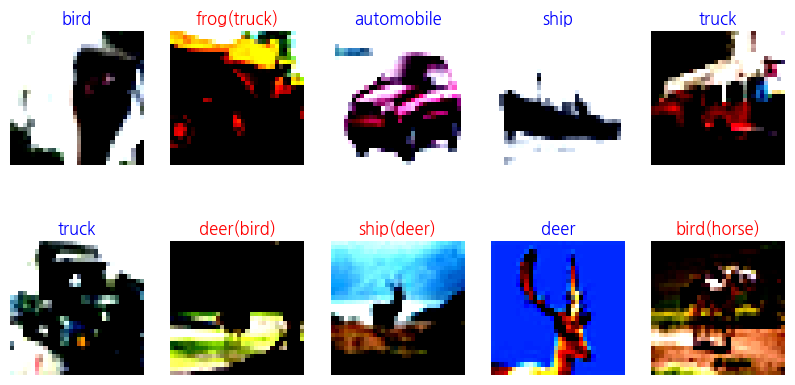

In [64]:
# 데이터 그리기
np.random.seed(100)
random_idx = np.random.randint(10000, size=10)

class_names = ['airplane','automobile', 'bird',' cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(figsize=(10, 5))

for i, idx in enumerate(random_idx):
    test = y_test[idx]
    pred = y_pred[idx]

    if test == pred:
        color = 'blue'
        title = f'{class_names[test]}'
    else:
        color = 'red'
        title = f'{class_names[pred]}({class_names[test]})'

    ax = plt.subplot(2, 5, i+1)

    ax.imshow(X_test[idx], cmap='gray')
    ax.set_title(title, color=color)
    ax.axis('off')